# kaggle study 23일차(fashion)

코드출처 : https://www.kaggle.com/bugraokcu/cnn-with-keras

## Brief Info
본 연구에서는 파이썬을 사용한 딥 러닝에 설명된 지침에 따라 케라스를 사용하여 CNN 분류기를 교육할 예정입니다.  
지침 링크 : https://www.manning.com/books/deep-learning-with-python  
  
우리의 전략은 분류기를 최적화하기 위해 열차 데이터의 20%(12000개 데이터 행)를 검증 세트로 사용하는 것과 동시에 테스트 데이터를 유지하여 본 적이 없는 데이터에 대한 모델의 정확도를 최종적으로 평가하는 것입니다.

#### Note
데이터가 이미 분할된 것인지 확실하지 않았기 때문에 검증_firmation=0.2를 전달하여 적합하도록 하지 않고, 검증_firmation_firmates가 마지막 20%의 데이터를 사용하기 때문에 명시적으로 shoubled 및 분할했습니다.  
참고 링크 : https://keras.io/getting_started/faq/#how-is-the-validation-split-computed

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/fashion/fashion-mnist_train.csv')
data_test = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/fashion/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#여기에서는 교육 중 분류기를 최적화하기 위해 검증 데이터를 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#테스트 데이터
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28,28

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

#### Training
fit을 실행해 봅시다. fit()는 교육 대 유효성 검사 정확도 및 손실을 플로팅하는 데 사용할 수 있는 History 개체를 반환합니다.

In [5]:
history = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,
                    verbose=1,validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 25s 129ms/step - loss: 1.2604 - accuracy: 0.5369 - val_loss: 0.5489 - val_accuracy: 0.7993
Epoch 2/50
188/188 [==============================] - 24s 125ms/step - loss: 0.5709 - accuracy: 0.7881 - val_loss: 0.4343 - val_accuracy: 0.8409
Epoch 3/50
188/188 [==============================] - 23s 120ms/step - loss: 0.4763 - accuracy: 0.8265 - val_loss: 0.3803 - val_accuracy: 0.8593
Epoch 4/50
188/188 [==============================] - 23s 120ms/step - loss: 0.4231 - accuracy: 0.8467 - val_loss: 0.3391 - val_accuracy: 0.8721
Epoch 5/50
188/188 [==============================] - 22s 119ms/step - loss: 0.3792 - accuracy: 0.8616 - val_loss: 0.3247 - val_accuracy: 0.8830
Epoch 6/50
188/188 [==============================] - 22s 116ms/step - loss: 0.3578 - accuracy: 0.8712 - val_loss: 0.3008 - val_accuracy: 0.8882
Epoch 7/50
188/188 [==============================] - 22s 116ms/step - loss: 0.3338 - accuracy: 0.8800 - val_loss: 0.2928 - val_ac

In [6]:
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.2107783406972885
Test accuracy: 0.9239000082015991


#### result
우리의 분류기는 여기 보고된 최고의 기준치보다 더 나은 것으로 밝혀졌습니다. 평균 정확도가 0.897인 SVM 분류기입니다.

손실뿐만 아니라 훈련 및 검증 정확도도 표시해 보겠습니다.

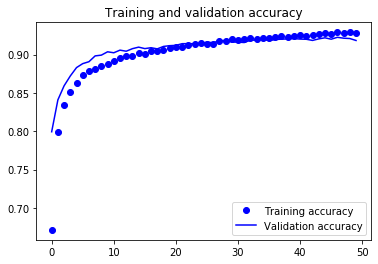

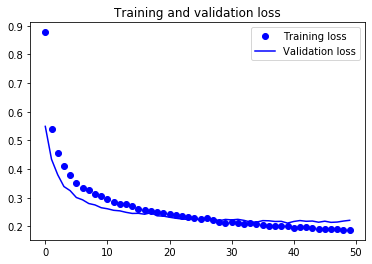

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Classification Report
우리는 분류기의 성능을 다음과 같이 요약할 수 있습니다.

In [36]:
#테스트 데이터에 대한 예측을 가져옵니다.
#지수를 플롯합니다.
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(list(predicted_classes==y_true))[0]
incorrect = np.nonzero(list(predicted_classes!=y_true))[0]

C:\Users\이동훈\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.84      0.88      1000
     Class 3       0.90      0.95      0.93      1000
     Class 4       0.87      0.90      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.78      0.78      0.78      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



우리 분류기가 정밀도와 회수율 면에서 6등급에 비해 성능이 떨어지는 게 분명해요. 클래스 2의 경우 분류기는 정밀도가 약간 부족한 반면 클래스 4에 대한 회수율(즉, 누락)은 약간 부족합니다.

아마도 우리는 정확하고 부정확한 예측을 시각화한 후에 더 많은 통찰력을 얻을 수 있을 것입니다.

다음은 올바르게 예측된 클래스의 부분 집합입니다.

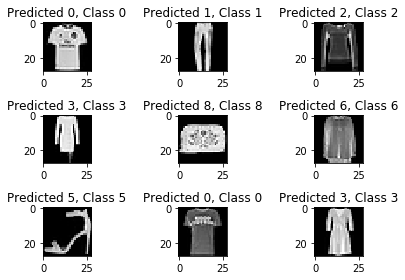

In [38]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

여기 잘못 예측된 클래스의 부분 집합이 있습니다.

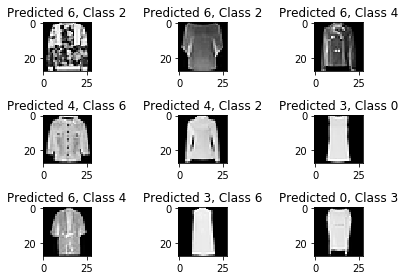

In [39]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

CNN은 강력한 아키텍처이지만 여러 클래스에 존재하는 유사한 패턴의 다양성은 분류기의 성능에 영향을 미치는 것으로 보입니다. 재킷, 셔츠, 그리고 긴 소매 블라우스는 유사한 패턴을 가지고 있습니다: 긴 소매, 단추, 기타 등등.

#### What do the activations look like?(활성화는 어떻게 생겼습니까?)
이 조각들은 Chollet, F (2017)에서 가져온 것입니다. 이 아이디어는 입력 데이터를 제공하고 변환기의 활성화를 시각화하는 것입니다.

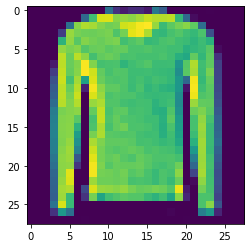

In [33]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

첫 번째 계층의 두 번째 채널의 활성화를 살펴보겠습니다.

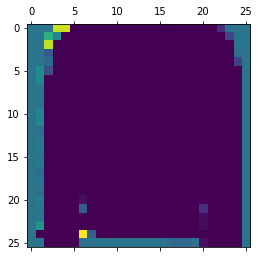

In [34]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input,layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

다른 컨베이어의 활성화도 플롯해 보겠습니다.

C:\user\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


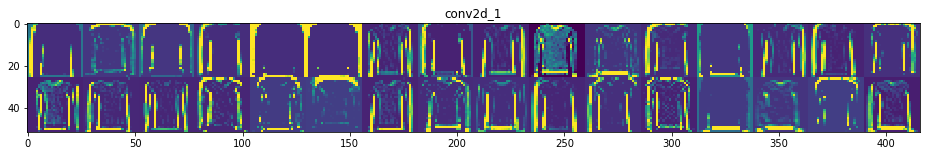

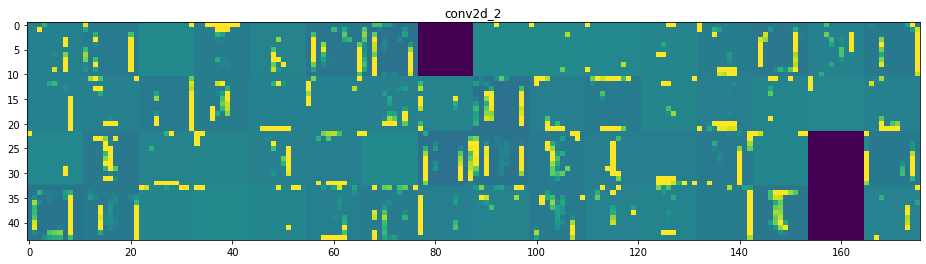

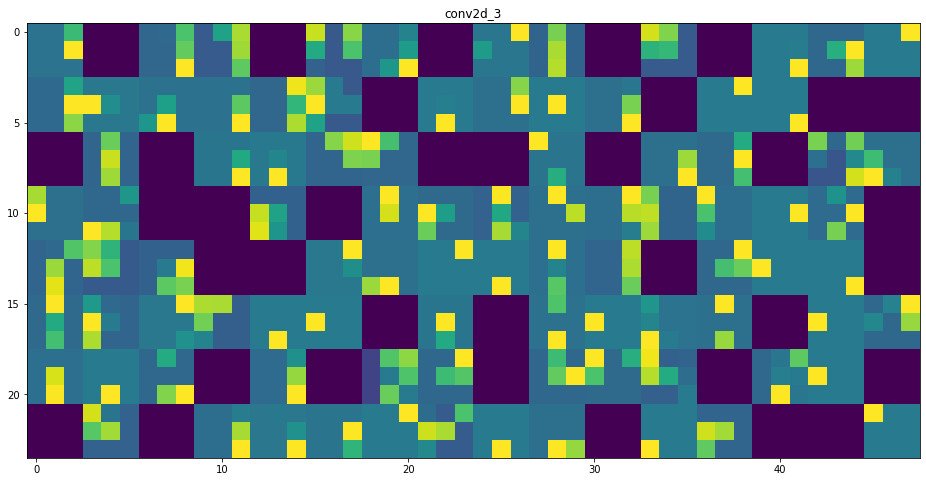

In [35]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')